# **Project Name**    - Gender Classification Model



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Mritunjay Mishra


# **Project Summary -**

The Gender Classification Model aims to accurately predict the gender of users based on their travel and hotel booking data. This project leverages insights from three datasets: Users, Flights, and Hotels, to develop a machine learning model capable of classifying gender effectively. Below is a detailed summary of the project.

### 1. Problem Statement

Understanding user demographics, such as gender, can significantly enhance personalized services and targeted marketing in industries like travel and hospitality. However, missing or incomplete gender data often hampers such efforts. This project focuses on building a robust model to predict the 'gender' column for cases where it is unavailable, utilizing behavioral patterns and spending data.

### 2. Data Sources

The project integrates three datasets:

- Users Dataset: Contains user-specific information, including user codes, company affiliations, names, gender (target variable), and age.

- Flights Dataset: Captures flight booking details such as travel codes, user codes, origin and destination, flight type, price, time, distance, agency, and booking dates.

- Hotels Dataset: Includes hotel reservation details like travel codes, user codes, hotel names, locations, duration of stay, prices, total costs, and booking dates.

### 3. Key Relationships

User Code: Links the Flights and Hotels datasets to the Users dataset, allowing user-level aggregation of travel and booking data.

Travel Code: Connects the Flights and Hotels datasets, providing insight into simultaneous travel and lodging behaviors.

# **GitHub Link -**

https://github.com/Jay-mishra04/MLOps-Project

# **Problem Statement**


Understanding user demographics, such as gender, can significantly enhance personalized services and targeted marketing in industries like travel and hospitality. However, missing or incomplete gender data often hampers such efforts. This project focuses on building a robust model to predict the 'gender' column for cases where it is unavailable, utilizing behavioral patterns and spending data.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [206]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
# Importing metrics for model evaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report  

# For saving the model
import joblib


## In this Project we have three different Datasets (users.csv, flights.csv, hotels.csv). 

## I am going to explore all the three dataset for this particular project. First I will explore then Users dataset then flights dataset and at last hotels dataset. After exploring all the three i am going to merge them on the basis of the commom columns and then perform the EDA and Machine Learning.

## **1. Users Dataset**

### Dataset Loading

In [26]:
# Load Dataset
users_df = pd.read_csv("Users.csv")

### Dataset First View

In [28]:
# Dataset First Look
users_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


### Dataset Rows & Columns count

In [30]:
# Dataset Rows & Columns count
print(f"Rows: {users_df.shape[0]}")
print(f"Columns: {users_df.shape[1]}")

Rows: 1340
Columns: 5


### Dataset Information

In [32]:
# Dataset Info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [34]:
# Dataset Duplicate Value Count
users_df.duplicated().sum()

0

#### Missing Values/Null Values

In [36]:
# Missing Values/Null Values Count
users_df.isnull().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

### What did you know about your dataset?

###### General Overview:

- The dataset contains 1340 rows and 5 columns.
- Each row represents a user, identified by a unique code.

###### Features Description:

- code: A unique identifier for each user.
- company: The company associated with the user.
- name: The name of the user.
- gender: The gender of the user, which could be male or female.
- age: The age of the user in years.

###### Data Quality:

- No missing values were found in any of the columns (isnull().sum() results in 0 for all features).
- No duplicate rows are present in the dataset (duplicated().sum() results in 0).

###### Data Types:

- The dataset contains a mix of integer and object types:
- code and age: int64 (numeric).
- company, name, and gender: object (categorical/text).


## ***Understanding Your Variables***

In [40]:
# Dataset Columns
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [41]:
# Dataset Describe
users_df.describe(include = "all")

,code,company,name,gender,age
count,1340.000000,1340,1340,1340,1340.000000
unique,NaN,5,1338,3,NaN
top,NaN,4You,Charlotte Johnson,male,NaN
freq,NaN,453,2,452,NaN
mean,669.500000,NaN,NaN,NaN,42.742537
std,386.968991,NaN,NaN,NaN,12.869779
min,0.000000,NaN,NaN,NaN,21.000000
25%,334.750000,NaN,NaN,NaN,32.000000
50%,669.500000,NaN,NaN,NaN,42.000000
75%,1004.250000,NaN,NaN,NaN,54.000000


### Variables Description 

**code:**
- Type: Numerical, unique user identifier.
- Range: 0 to 1339, Mean: 669.5.

**company:**
- Type: Categorical, user’s company.
- Unique: 5, Most common: 4You (453 users).

**name:**
- Type: Categorical, user’s name.
- Unique: 1338, Most common: Charlotte Johnson (2 users).

**gender:**
- Type: Categorical, user’s gender.
- Unique: 3, Most common: male (452 users).

**age:**
- Type: Numerical, user’s age.
- Range: 21 to 65, Mean: 42.74, Median: 42.

### Check Unique Values for each variable.

In [45]:
# Check Unique Values for each variable.
columns = users_df.columns
for i in columns:
    if i != "date":
        unique_values = users_df[i].unique()
        print(f"{i} : {unique_values}")
        print()

code : [   0    1    2 ... 1337 1338 1339]

company : ['4You' 'Monsters CYA' 'Wonka Company' 'Acme Factory' 'Umbrella LTDA']

name : ['Roy Braun' 'Joseph Holsten' 'Wilma Mcinnis' ... 'James Gimenez'
 'Viola Agosta' 'Paul Rodriguez']

gender : ['male' 'female' 'none']

age : [21 37 48 23 44 47 46 41 35 36 61 53 56 25 65 22 51 60 64 49 62 59 40 34
 27 42 24 54 28 55 39 38 32 29 52 57 31 45 30 43 58 63 50 26 33]



## **2. Flight Dataset**

### Dataset Loading

In [48]:
flights_df = pd.read_csv("flights.csv")

### Dataset First View

In [50]:
# Dataset First Look
flights_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### Dataset Rows & Columns count

In [52]:
# Dataset Rows & Columns count
print(f"Rows: {flights_df.shape[0]}")
print(f"Columns: {flights_df.shape[1]}")

Rows: 271888
Columns: 10


### Dataset Information

In [54]:
# Dataset Info
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


#### Duplicate Values

In [56]:
# Dataset Duplicate Value Count
flights_df.duplicated().sum()

0

#### Missing Values/Null Values

In [58]:
# Missing Values/Null Values Count
flights_df.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

### What did you know about your dataset?

**General Overview:**

- The dataset contains 271,888 rows and 10 columns.
- Each row represents a unique flight record.

**Features Description:**

- travelCode: A unique identifier for each travel record.
- userCode: Links flights to the respective users from the Users dataset.
- from and to: Represent the origin and destination locations of the flights.
- flightType: Type of flight, such as first class.
- price: Cost of the flight in monetary terms.
- time: Flight duration in hours.
- distance: Distance of the flight in kilometers.
- agency: The flight agency responsible for the booking.
- date: The date of the flight.

**Data Quality:**

- No Missing Values: All columns are fully populated (isnull().sum() returns 0).
- No Duplicate Rows: No repeated entries are present (duplicated().sum() returns 0).

**Data Types:**

- Numerical: travelCode, userCode, price, time, and distance.
- Categorical: from, to, flightType, agency, and date.

**Size and Memory Usage:**

- The dataset is large, with 271,888 entries and 20.7+ MB memory usage.


## ***Understanding Your Variables***

In [62]:
# Dataset Columns
flights_df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [63]:
flights_df.describe(include = "all")

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
count,271888.000000,271888.000000,271888,271888,271888,271888.00000,271888.000000,271888.000000,271888,271888
unique,NaN,NaN,9,9,3,NaN,NaN,NaN,3,999
top,NaN,NaN,Florianopolis (SC),Florianopolis (SC),firstClass,NaN,NaN,NaN,Rainbow,09/26/2019
freq,NaN,NaN,57317,57317,116418,NaN,NaN,NaN,116752,1335
mean,67971.500000,667.505495,NaN,NaN,NaN,957.37503,1.421147,546.955535,NaN,NaN
std,39243.724665,389.523127,NaN,NaN,NaN,362.31189,0.542541,208.851288,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,301.51000,0.440000,168.220000,NaN,NaN
25%,33985.750000,326.000000,NaN,NaN,NaN,672.66000,1.040000,401.660000,NaN,NaN
50%,67971.500000,659.000000,NaN,NaN,NaN,904.00000,1.460000,562.140000,NaN,NaN
75%,101957.250000,1011.000000,NaN,NaN,NaN,1222.24000,1.760000,676.530000,NaN,NaN


### Variables Description 

**travelCode:**

- Type: Numerical (int64)
- Description: Unique identifier for each travel record.
- Statistics:
- Mean: 67971.50
- Range: 0 to 135943

**userCode:**

- Type: Numerical (int64)
- Description: Identifier linking flights to users from the Users dataset.
- Statistics:
- Mean: 667.51
- Range: 0 to 1339

**from:**

- Type: Categorical (object)
- Description: Origin city of the flight.
- Unique Values: 9
- Most Frequent: Florianopolis (SC) (57317 occurrences)

**to:**

- Type: Categorical (object)
- Description: Destination city of the flight.
- Unique Values: 9
- Most Frequent: Florianopolis (SC) (57317 occurrences)

**flightType:**

- Type: Categorical (object)
- Description: Type of flight (e.g., firstClass).
- Unique Values: 3
- Most Frequent: firstClass (116418 occurrences)

**price:**

- Type: Numerical (float64)
- Description: Cost of the flight in monetary terms.
- Statistics:
- Mean: 957.38
- Range: 301.51 to 1754.17

**time:**

- Type: Numerical (float64)
- Description: Flight duration in hours.
- Statistics:
- Mean: 1.42
- Range: 0.44 to 2.44

**distance:**

- Type: Numerical (float64)
- Description: Distance of the flight in kilometers.
- Statistics:
- Mean: 546.96
- Range: 168.22 to 937.77

**agency:**

- Type: Categorical (object)
- Description: Agency managing the flight.
- Unique Values: 3
- Most Frequent: Rainbow (116752 occurrences)

**date:**

- Type: Categorical (object)
- Description: Date of the flight.
- Unique Dates: 999
- Most Frequent: 09/26/2019 (1335 occurrences)

### Check Unique Values for each variable.

In [67]:
# Check Unique Values for each variable.
columns = flights_df.columns
for i in columns:
    if i != "date":
        unique_values = flights_df[i].unique()
        print(f"{i} : {unique_values}")
        print()


travelCode : [     0      1      2 ... 135941 135942 135943]

userCode : [   0    1    2 ... 1337 1338 1339]

from : ['Recife (PE)' 'Florianopolis (SC)' 'Brasilia (DF)' 'Aracaju (SE)'
 'Salvador (BH)' 'Campo Grande (MS)' 'Sao Paulo (SP)' 'Natal (RN)'
 'Rio de Janeiro (RJ)']

to : ['Florianopolis (SC)' 'Recife (PE)' 'Brasilia (DF)' 'Salvador (BH)'
 'Aracaju (SE)' 'Campo Grande (MS)' 'Sao Paulo (SP)' 'Natal (RN)'
 'Rio de Janeiro (RJ)']

flightType : ['firstClass' 'economic' 'premium']

price : [1434.38 1292.29 1487.52 1127.36 1684.05 1531.92  743.54  877.56  803.39
  695.3  1287.52  898.04 1070.54 1013.4   964.83  811.73  513.06  829.91
  583.6   506.56  992.17  824.31 1268.97  882.86  965.62  706.36  893.65
  742.94  474.6   563.23 1021.53 1215.45  301.51  429.77  791.66  697.51
 1596.61 1348.04 1069.12 1185.95 1214.82  959.29  568.38  573.61 1576.97
 1087.18  446.73  647.9  1242.65 1016.53  427.25  479.37  604.14  684.88
 1190.94 1381.55 1346.6   836.89  630.34  906.59 1181.19 1119.47

## **3. Hotels Dataset**

In [69]:
### Dataset Loading
hotels_df = pd.read_csv("hotels.csv")

In [70]:
hotels_df.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [71]:
# Dataset Rows & Columns count
print(f"Rows: {hotels_df.shape[0]}")
print(f"Columns: {hotels_df.shape[1]}")


Rows: 40552
Columns: 8


In [72]:
# information about the hotels dataframe
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [73]:
# checking for the duplicates 
hotels_df.duplicated().sum()

0

In [74]:
# checking for the null values
hotels_df.isnull().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

### What did you know about your dataset?

**General Overview:**

- The dataset contains 40,552 rows and 8 columns.
- Each row represents a unique hotel booking record.

**Features Description:**

- travelCode: Unique identifier for each travel record.
- userCode: Links hotel bookings to the respective users from the Users dataset.
- name: Name of the hotel.
- place: Location of the hotel.
- days: Duration of the hotel stay in days.
- price: Price per day for the stay.
- total: Total cost of the hotel stay.
- date: Date of the booking.

**Data Quality:**

- No Missing Values: All columns are fully populated (isnull().sum() returns 0).
- No Duplicate Rows: No repeated entries are present (duplicated().sum() returns 0).

**Data Types:**

- Numerical: travelCode, userCode, days, price, total.
- Categorical: name, place, date.

In [77]:
hotels_df.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date'],
      dtype='object')

In [78]:
# understand each variables
hotels_df.describe(include = "all")

,travelCode,userCode,name,place,days,price,total,date
count,40552.000000,40552.000000,40552,40552,40552.000000,40552.000000,40552.000000,40552
unique,NaN,NaN,9,9,NaN,NaN,NaN,199
top,NaN,NaN,Hotel K,Salvador (BH),NaN,NaN,NaN,10/31/2019
freq,NaN,NaN,5094,5094,NaN,NaN,NaN,404
mean,67911.794461,666.963726,NaN,NaN,2.499679,214.439554,536.229513,NaN
std,39408.199333,391.136794,NaN,NaN,1.119326,76.742305,319.331482,NaN
min,0.000000,0.000000,NaN,NaN,1.000000,60.390000,60.390000,NaN
25%,33696.750000,323.000000,NaN,NaN,1.000000,165.990000,247.620000,NaN
50%,67831.000000,658.000000,NaN,NaN,2.000000,242.880000,495.240000,NaN
75%,102211.250000,1013.000000,NaN,NaN,4.000000,263.410000,742.860000,NaN


### Variables Description 

**travelCode:**

- Type: Numerical (int64)
- Description: Unique identifier for each travel record.
- Statistics:
- Mean: 67911.79
- Range: 0 to 135942

**userCode:**

- Type: Numerical (int64)
- Description: Identifier linking hotel stays to the respective users from the Users dataset.
- Statistics:
- Mean: 666.96
- Range: 0 to 1339

**name:**
- Type: Categorical (object)
- Description: Name of the hotel.
- Statistics:
- Unique Values: 9
- Most Frequent Hotel: Hotel K (5094 occurrences)

**place:**

- Type: Categorical (object)
- Description: Location of the hotel.
- Statistics:
- Unique Values: 9
- Most Frequent Location: Salvador (BH) (5094 occurrences)

**days:**

- Type: Numerical (int64)
- Description: Number of days of the hotel stay.
- Statistics:
- Mean: 2.50
- Range: 1 to 4

**price:**

- Type: Numerical (float64)
- Description: Price per day of the hotel stay.
- Statistics:
- Mean: 214.44
- Range: 60.39 to 313.02

**total:**

- Type: Numerical (float64)
- Description: Total cost of the hotel stay.
- Statistics:
- Mean: 536.23
- Range: 60.39 to 1252.08

**date:**

- Type: Categorical (object)
- Description: Date of the booking.
- Statistics:
- Unique Dates: 199
- Most Frequent Date: 10/31/2019 (404 occurrences)

In [81]:
# Check Unique Values for each variable.
columns = hotels_df.columns
for i in columns:
    if i != "date":
        unique_values = hotels_df[i].unique()
        print(f"{i} : {unique_values}")
        print()

travelCode : [     0      2      7 ... 135940 135941 135942]

userCode : [   0    1    2 ... 1337 1338 1339]

name : ['Hotel A' 'Hotel K' 'Hotel BD' 'Hotel Z' 'Hotel AU' 'Hotel AF' 'Hotel BW'
 'Hotel CB' 'Hotel BP']

place : ['Florianopolis (SC)' 'Salvador (BH)' 'Natal (RN)' 'Aracaju (SE)'
 'Recife (PE)' 'Sao Paulo (SP)' 'Campo Grande (MS)' 'Rio de Janeiro (RJ)'
 'Brasilia (DF)']

days : [4 2 3 1]

price : [313.02 263.41 242.88 208.04 312.83 139.1   60.39 165.99 247.62]

total : [1252.08  526.82  790.23 1053.64  313.02  485.76  416.08 1251.32  278.2
  417.3   263.41  181.17  242.88  120.78  626.04  832.16  165.99  990.48
  971.52  312.83  139.1   247.62  663.96  938.49  556.4   241.56  625.66
  624.12  939.06  495.24  728.64  331.98  742.86   60.39  497.97  208.04]



## 3. ***Data Wrangling***

#### Above i have explored all the three datsets. Now i am going to wrangle them for the EDA part

In [84]:
# viewing the users dataset
users_df.head(3)

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48


In [85]:
# viewing the flights dataset
flights_df.head(3)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019


In [86]:
# viewing the hotels dataset
hotels_df.head(3)

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019


### Data Wrangling Code

In [88]:
users_df.head(3)

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48


In [89]:
# merging the users and hotels dataset
users_and_hotels = pd.merge( users_df,  hotels_df, left_on="code", right_on="userCode", how="inner", suffixes=("_users", "_hotels"))
users_and_hotels.head(3)

,code,company,name_users,gender,age,travelCode,userCode,name_hotels,place,days,price,total,date
0,0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,0,4You,Roy Braun,male,21,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019


In [90]:
# merging the users and flights dataset
users_and_flights = pd.merge( users_df,  flights_df, left_on="code", right_on="userCode", how="inner", suffixes=("_users", "_flights"))
users_and_flights.head(3)

,code,company,name,gender,age,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,4You,Roy Braun,male,21,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,4You,Roy Braun,male,21,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,0,4You,Roy Braun,male,21,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019


In [91]:
# merging all the three dataset on the basis of the common columns
merged_df = pd.merge( users_and_hotels,  flights_df, left_on="code", right_on="userCode", how="inner")

In [92]:
merged_df.head()

,code,company,name_users,gender,age,travelCode_x,userCode_x,name_hotels,place,days,...,travelCode_y,userCode_y,from,to,flightType,price_y,time,distance,agency,date_y
0,0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,...,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,...,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,...,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,...,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,...,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [93]:
# viewing all the columns of the merged dataset
merged_df.columns

Index(['code', 'company', 'name_users', 'gender', 'age', 'travelCode_x',
       'userCode_x', 'name_hotels', 'place', 'days', 'price_x', 'total',
       'date_x', 'travelCode_y', 'userCode_y', 'from', 'to', 'flightType',
       'price_y', 'time', 'distance', 'agency', 'date_y'],
      dtype='object')

In [94]:
# dropping the irrelevant columns
merged_df.drop(columns = ['name_users', 'travelCode_x', 'userCode_x', 'date_x', 'travelCode_y', 'userCode_y', 'from', 'to', 'date_y'], inplace = True)

In [95]:
# renaming the columns 
merged_df.rename(columns = {"price_x" : "price_hotel", "price_y" : "price_flight", "days" : "days_in_hotel", "place" : "hotel_place", "time" : "flight_time", "distance": "flight_distance"}, inplace = True)

In [96]:
merged_df.head()

,code,company,gender,age,name_hotels,hotel_place,days_in_hotel,price_hotel,total,flightType,price_flight,flight_time,flight_distance,agency
0,0,4You,male,21,Hotel A,Florianopolis (SC),4,313.02,1252.08,firstClass,1434.38,1.76,676.53,FlyingDrops
1,0,4You,male,21,Hotel A,Florianopolis (SC),4,313.02,1252.08,firstClass,1292.29,1.76,676.53,FlyingDrops
2,0,4You,male,21,Hotel A,Florianopolis (SC),4,313.02,1252.08,firstClass,1487.52,1.66,637.56,CloudFy
3,0,4You,male,21,Hotel A,Florianopolis (SC),4,313.02,1252.08,firstClass,1127.36,1.66,637.56,CloudFy
4,0,4You,male,21,Hotel A,Florianopolis (SC),4,313.02,1252.08,firstClass,1684.05,2.16,830.86,CloudFy


In [97]:
print("Rows in merged dataset:", merged_df.shape[0])
print("Columns in merged dataset:", merged_df.shape[1])

Rows in merged dataset: 11042106
Columns in merged dataset: 14


In [98]:
# checking for duplicates
print("Duplicates found in merged dataset is:", merged_df.duplicated().sum())

Duplicates found in merged dataset is: 7952504


In [99]:
# dropping the duplicates
merged_df.drop_duplicates(inplace = True)

In [100]:
print("Rows in merged dataset:", merged_df.shape[0])
print("Columns in merged dataset:", merged_df.shape[1])

Rows in merged dataset: 3089602
Columns in merged dataset: 14


In [101]:
# viewing information of merged_df
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3089602 entries, 0 to 11042105
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   code             int64  
 1   company          object 
 2   gender           object 
 3   age              int64  
 4   name_hotels      object 
 5   hotel_place      object 
 6   days_in_hotel    int64  
 7   price_hotel      float64
 8   total            float64
 9   flightType       object 
 10  price_flight     float64
 11  flight_time      float64
 12  flight_distance  float64
 13  agency           object 
dtypes: float64(5), int64(3), object(6)
memory usage: 353.6+ MB


In [102]:
merged_df.describe(include = "all")

,code,company,gender,age,name_hotels,hotel_place,days_in_hotel,price_hotel,total,flightType,price_flight,flight_time,flight_distance,agency
count,3.089602e+06,3089602,3089602,3.089602e+06,3089602,3089602,3.089602e+06,3.089602e+06,3.089602e+06,3089602,3.089602e+06,3.089602e+06,3.089602e+06,3089602
unique,NaN,5,3,NaN,9,9,NaN,NaN,NaN,3,NaN,NaN,NaN,3
top,NaN,4You,female,NaN,Hotel K,Salvador (BH),NaN,NaN,NaN,firstClass,NaN,NaN,NaN,Rainbow
freq,NaN,1360592,1058702,NaN,378424,378424,NaN,NaN,NaN,1322440,NaN,NaN,NaN,1327892
mean,5.898475e+02,NaN,NaN,4.275633e+01,NaN,NaN,2.505413e+00,2.152232e+02,5.395325e+02,NaN,9.516963e+02,1.392917e+00,5.360863e+02,NaN
std,3.819854e+02,NaN,NaN,1.297155e+01,NaN,NaN,1.116992e+00,7.730657e+01,3.208618e+02,NaN,3.615651e+02,5.492661e-01,2.114567e+02,NaN
min,0.000000e+00,NaN,NaN,2.100000e+01,NaN,NaN,1.000000e+00,6.039000e+01,6.039000e+01,NaN,3.015100e+02,4.400000e-01,1.682200e+02,NaN
25%,2.510000e+02,NaN,NaN,3.200000e+01,NaN,NaN,2.000000e+00,1.659900e+02,2.476200e+02,NaN,6.698300e+02,1.020000e+00,3.927600e+02,NaN
50%,5.640000e+02,NaN,NaN,4.200000e+01,NaN,NaN,3.000000e+00,2.428800e+02,4.952400e+02,NaN,8.984600e+02,1.460000e+00,5.621400e+02,NaN
75%,8.790000e+02,NaN,NaN,5.400000e+01,NaN,NaN,4.000000e+00,2.634100e+02,7.428600e+02,NaN,1.215450e+03,1.760000e+00,6.765300e+02,NaN


In [103]:
# saving the merged dataset
merged_df.to_csv("users_hotels_flights.csv", index = False)

### What all manipulations have you done and insights you found?

#### Manipulations Done

**Merging Datasets:**

- The users_df, hotels_df, and flights_df datasets were merged based on common keys (code and userCode) using an inner join.
- This resulted in a combined dataset merged_df containing information from all three datasets.

**Column Renaming:**
- Renamed columns like price_x and price_y to more descriptive names such as price_hotel and price_flight.

**Dropping Unnecessary Columns:**
- Columns such as name_users, travelCode_x, travelCode_y, userCode_x, and duplicate date columns were dropped to clean the dataset.

**Duplicate Check and Removal:**
- Checked for duplicate rows in the merged dataset.
- Identified and removed duplicate entries to ensure data integrity.

**Dataset Overview:**
- Reviewed the shape and structure of the merged_df dataset to understand the number of rows and columns after wrangling.

**Data Summary:**
- Utilized .info() and .describe() to analyze data types, missing values, and summary statistics for numerical columns.

**Saved the Cleaned Dataset:**
- Saved the cleaned and merged dataset into a CSV file named users_hotels_flights.csv for further analysis.

#### Insights Found
**Dataset Composition:**
- The final merged dataset has 3,089,602 rows and 14 columns after cleaning and wrangling.

**Unique Values:**
- For categorical columns like gender, name_hotels, and hotel_place, a significant number of unique values were identified, which are useful for grouping and EDA.

**Most Frequent Entries:**
- The most frequent company is 4You, and the most booked hotel is Hotel K.
- The most common hotel location is Salvador (BH), and the preferred flight type is firstClass.

**Price Analysis:**
- The minimum hotel price was 60.39, while the maximum was 313.02.
- The flight price ranged between 301.51 and 1754.17.

**Data Quality:**
- The dataset had duplicate entries, which were successfully removed.
- There are no missing values in critical columns after wrangling, indicating the dataset is ready for modeling.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [108]:
gender_count_by_company = users_df.groupby(["company", "gender"])["gender"].count().unstack()
gender_count_by_company 

gender,female,male,none
company,,,
4You,151,138,164
Acme Factory,85,93,83
Monsters CYA,64,61,70
Umbrella LTDA,69,70,55
Wonka Company,79,90,68


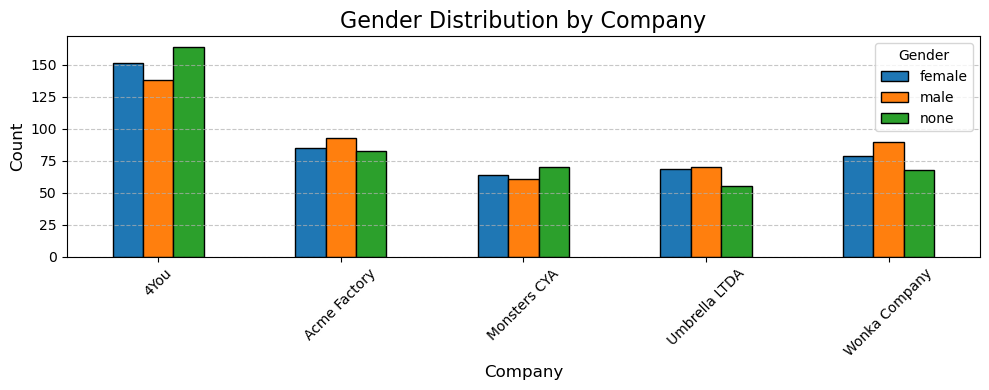

In [109]:
gender_count_by_company.plot(kind="bar", figsize=(10, 4), edgecolor="black")
plt.title("Gender Distribution by Company", fontsize=16)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was selected because it effectively visualizes the distribution of gender categories (female, male, none) across different company categories. It allows easy comparison between companies and gender distributions.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals variations in the gender distribution across companies:
- The company 4You has the highest overall counts for all genders, with the none category being the most frequent.
- Companies like Acme Factory and Umbrella LTDA have relatively balanced distributions between the genders.
- Wonka Company and Monsters CYA also show notable differences, but the none gender is consistent across the companies.
- Company can provide indirect insights into gender distribution since some companies have imbalanced gender representations. This makes it a potentially useful feature in predicting gender.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Marketing or HR campaigns can be tailored to the gender distribution of each company to improve engagement or hiring diversity.

#### Chart - 2

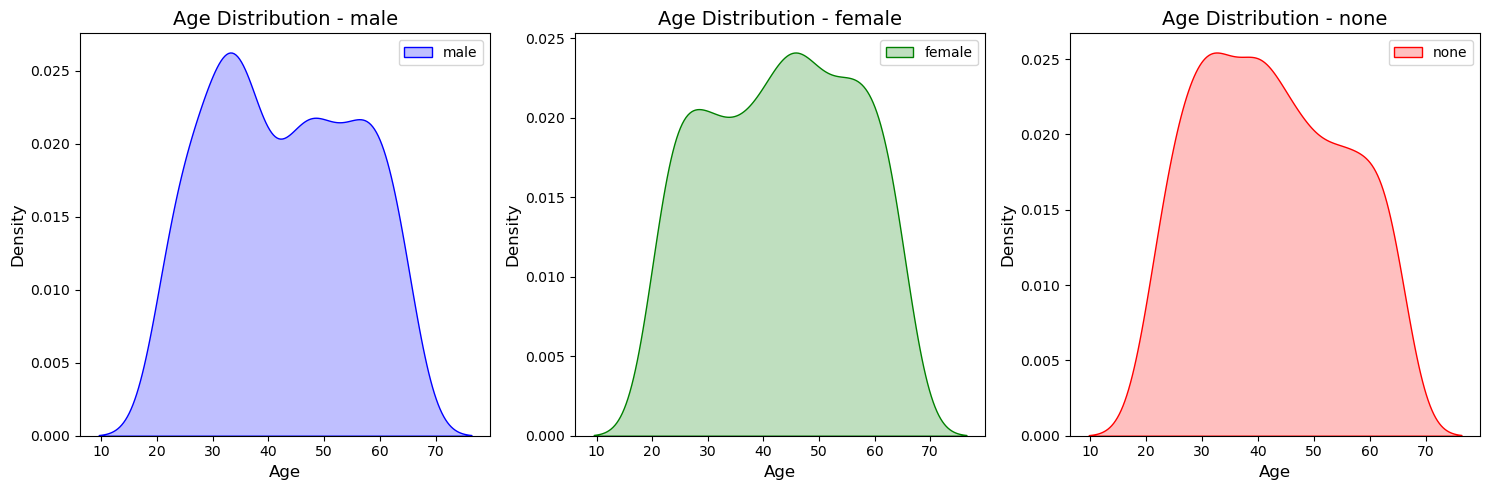

In [117]:
# Extract unique genders from the dataset
genders = users_df["gender"].unique()  # Get unique gender values
colors = ["blue", "green", "red"]  

# Create subplots for each gender
plt.figure(figsize=(15, 5))
for i in range(len(genders)):
    plt.subplot(1, 3, i+1)  
    sns.kdeplot(data=users_df[users_df["gender"] == genders[i]], x="age", fill=True, color=colors[i], label=genders[i])
    plt.title(f"Age Distribution - {genders[i]}", fontsize=14)
    plt.xlabel("Age", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

# Adjust layout to fit the plots
plt.tight_layout()
plt.show()
    

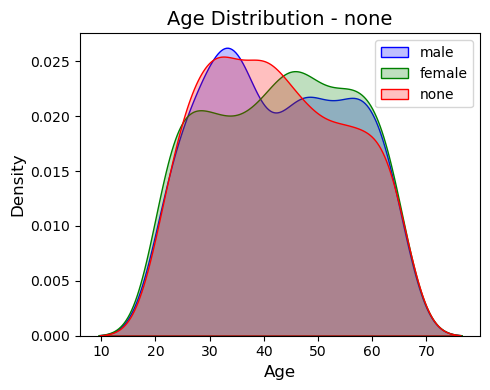

In [118]:
# Extract unique genders from the dataset
genders = users_df["gender"].unique()  
colors = ["blue", "green", "red"]  

# Create subplots for each gender
plt.figure(figsize=(5, 4))
for i in range(len(genders)):
    sns.kdeplot(data=users_df[users_df["gender"] == genders[i]], x="age", fill=True, color=colors[i], label=genders[i])
    plt.title(f"Age Distribution - {genders[i]}", fontsize=14)
    plt.xlabel("Age", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

# Adjust layout to fit the plots
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The KDE plot was chosen because it effectively shows the probability density of the age variable for each gender. The subplots provide clarity by separating the distributions for male, female, and none categories, while the overlaid KDE chart enables direct comparison.

##### 2. What is/are the insight(s) found from the chart?

- Males and females have fairly similar age distributions, with peaks in the 30–40 and 50–60 age ranges.
- The none category also shows a similar trend, though it appears more uniform and spread out.

- All three genders share overlapping distributions, indicating no significant differences in age that could independently predict gender.
- The none gender shows slightly broader distribution compared to male and female.
- Since all three genders have overlapping age distributions with no distinct differences, age alone is unlikely to provide meaningful predictive power for gender.
- While age alone may not strongly predict gender, in combination with other features (e.g., company or location), it could contribute to better predictions.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:
- Understanding age distribution can aid in creating targeted marketing campaigns and strategies for different gender groups.
- The none gender’s broader age distribution might indicate incomplete or inconsistent data collection in specific age ranges, prompting better data collection practices.

#### Chart - 3

In [126]:
# making visualization from the users_and_hotels dataset
users_and_hotels.head(2)

,code,company,name_users,gender,age,travelCode,userCode,name_hotels,place,days,price,total,date
0,0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019


In [127]:
# Chart - 3 visualization code
gender_count_by_hotels = users_and_hotels.groupby(["name_hotels", "gender"])["gender"].count().unstack()
gender_count_by_hotels

gender,female,male,none
name_hotels,,,
Hotel A,1103,1100,1127
Hotel AF,1650,1579,1599
Hotel AU,1504,1501,1462
Hotel BD,1610,1609,1610
Hotel BP,1470,1497,1470
Hotel BW,1517,1431,1385
Hotel CB,1714,1679,1636
Hotel K,1733,1759,1602
Hotel Z,1389,1430,1386


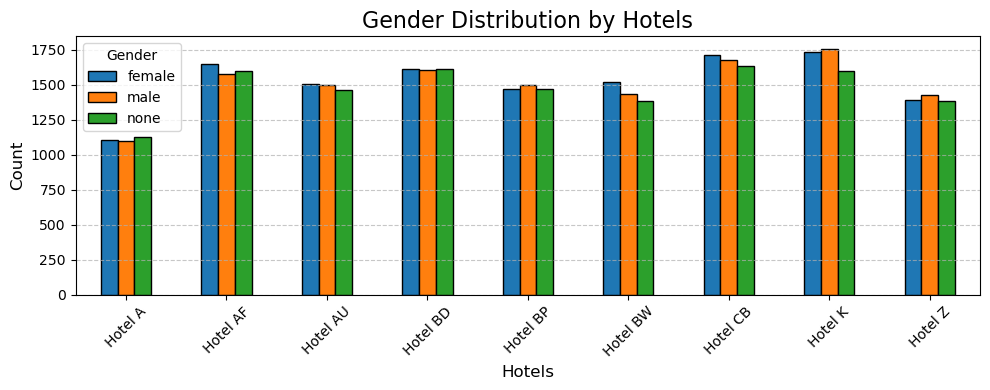

In [128]:
gender_count_by_hotels.plot(kind="bar", figsize=(10, 4), edgecolor="black")
plt.title("Gender Distribution by Hotels", fontsize=16)
plt.xlabel("Hotels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen because it provides a clear visual representation of gender distribution (female, male, none) across different hotels. It allows for easy comparison among the hotels.

##### 2. What is/are the insight(s) found from the chart?

- Gender distribution across hotels is relatively balanced, with small variations:
- Hotels like Hotel K and Hotel CB show a slightly higher count of male users compared to female and none.
- Other hotels, such as Hotel BP and Hotel AU, have a nearly equal distribution of all three genders.
- The none gender category is consistently present across all hotels, indicating incomplete or missing gender data.
- Some hotels show slightly imbalanced gender distributions, which could provide indirect information about a user's gender. However, the overall balance across most hotels may reduce its predictive power.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes
- Hotels with significant differences in gender distribution can adjust their marketing strategies to better target underrepresented groups.
- The consistent presence of the none gender category suggests a need for better data collection practices to improve personalization and business strategies.

#### Chart - 4

In [136]:
# Chart - 4 visualization code
gender_count_by_hotel_location = users_and_hotels.groupby(["place", "gender"])["gender"].count().unstack()
gender_count_by_hotel_location 

gender,female,male,none
place,,,
Aracaju (SE),1389,1430,1386
Brasilia (DF),1470,1497,1470
Campo Grande (MS),1517,1431,1385
Florianopolis (SC),1103,1100,1127
Natal (RN),1610,1609,1610
Recife (PE),1504,1501,1462
Rio de Janeiro (RJ),1714,1679,1636
Salvador (BH),1733,1759,1602
Sao Paulo (SP),1650,1579,1599


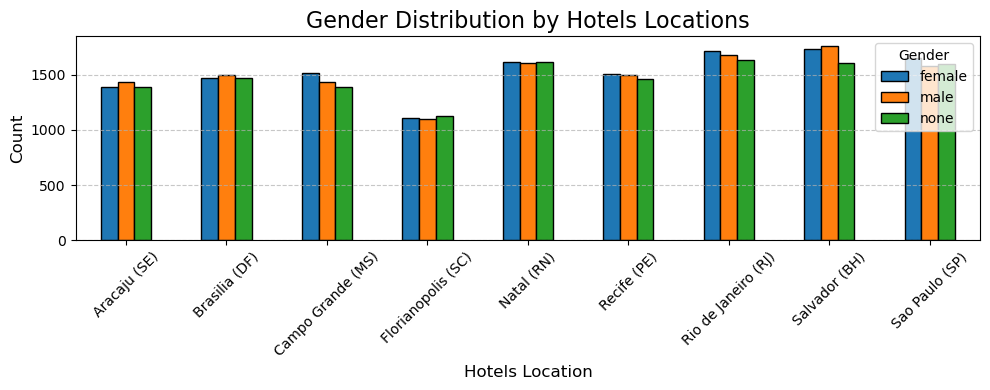

In [137]:
gender_count_by_hotel_location.plot(kind="bar", figsize=(10, 4), edgecolor="black")
plt.title("Gender Distribution by Hotels Locations", fontsize=16)
plt.xlabel("Hotels Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was selected because it clearly shows the gender distribution (female, male, none) across different hotel locations. It allows for straightforward comparison of gender counts for each location.

##### 2. What is/are the insight(s) found from the chart?

- Gender distribution across hotel locations is relatively balanced, with slight variations:
- Locations such as Brasilia (DF) and Salvador (BH) show a slight dominance of the male gender.
- The none category remains consistently present across all locations, highlighting a need for better data collection on gender.
- Locations like Campo Grande (MS) and Florianopolis (SC) have nearly equal distributions of all three genders.
- Some hotel locations show slight imbalances in gender distribution, which could provide useful contextual information for predicting gender. However, the differences are subtle and might not be strong predictors on their own.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Understanding gender distribution by location can help in tailoring services and marketing efforts specific to the demographic composition at each location.
- Identifying locations with a significant none gender category can highlight gaps in data collection and encourage targeted efforts to improve accuracy.

#### Chart - 5

In [145]:
# making visualization from the users_and_hotels dataset
users_and_hotels.head(2)

,code,company,name_users,gender,age,travelCode,userCode,name_hotels,place,days,price,total,date
0,0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019


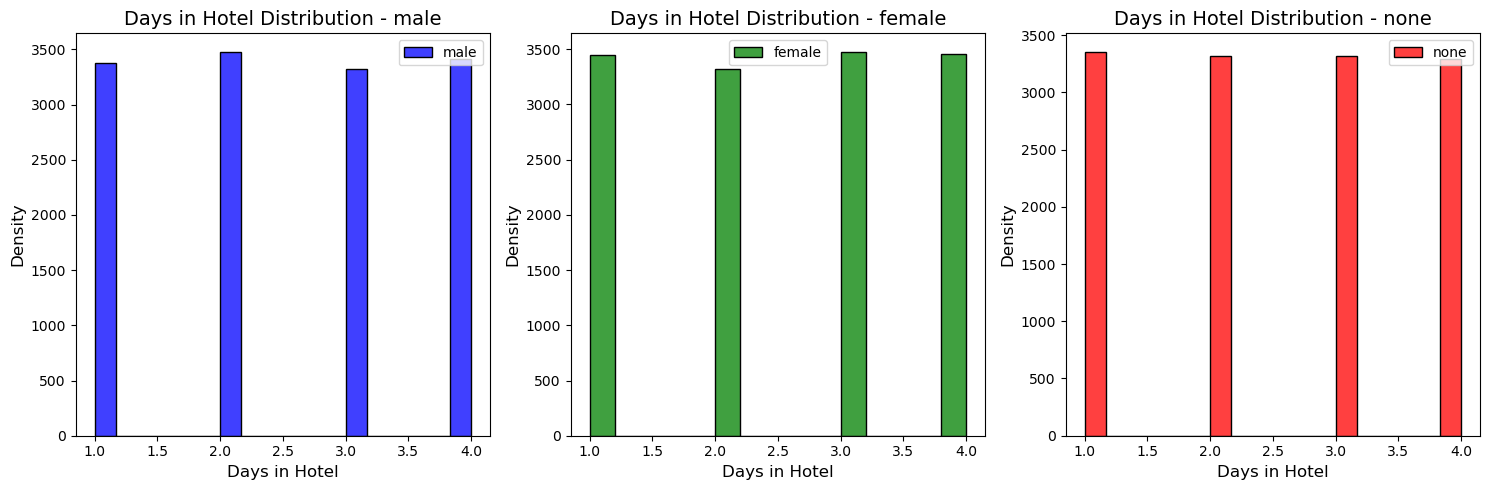

In [146]:
# Chart - 5 visualization code
# Extract unique genders from the dataset
genders = users_and_hotels["gender"].unique()  
colors = ["blue", "green", "red"]  

# Create subplots for each gender
plt.figure(figsize=(15, 5))
for i in range(len(genders)):
    plt.subplot(1, 3, i+1)  
    sns.histplot(data=users_and_hotels[users_and_hotels["gender"] == genders[i]], x="days", fill=True, color=colors[i], label=genders[i])
    plt.title(f"Days in Hotel Distribution - {genders[i]}", fontsize=14)
    plt.xlabel("Days in Hotel", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

# Adjust layout to fit the plots
plt.tight_layout()
plt.show()
    

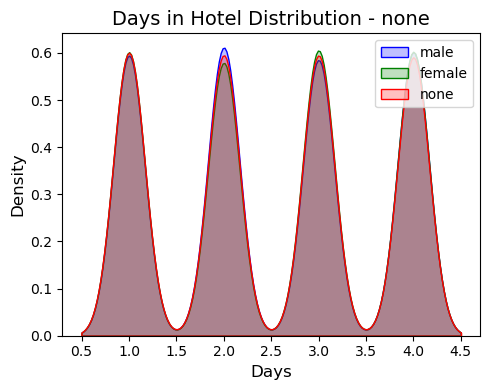

In [147]:
# Extract unique genders from the dataset
genders = users_and_hotels["gender"].unique()  
colors = ["blue", "green", "red"]  

# Create subplots for each gender
plt.figure(figsize=(5, 4))
for i in range(len(genders)):
    sns.kdeplot(data=users_and_hotels[users_and_hotels["gender"] == genders[i]], x="days", fill=True, color=colors[i], label=genders[i])
    plt.title(f"Days in Hotel Distribution - {genders[i]}", fontsize=14)
    plt.xlabel("Days", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

# Adjust layout to fit the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The KDE plot was chosen to visualize the density distribution of days (number of days stayed in hotels) for each gender. This allows for an easy comparison of patterns and trends in the duration of stays across gender groups.

##### 2. What is/are the insight(s) found from the chart?

- The distribution of days is discrete and clustered around specific values (1, 2, 3, and 4 days), indicating most stays are short-term.
- All genders (male, female, none) exhibit almost identical distributions, with no significant variation between them. This suggests that the length of stay is not influenced by gender.
- The distributions are nearly identical across all genders, providing no meaningful distinction or predictive power for determining gender.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Understanding the duration of stays can help hotels optimize their operations, such as room turnover and resource allocation.
- The consistency across genders indicates that marketing strategies or offers related to the length of stay can be uniformly applied without gender-based differentiation

#### Chart - 6

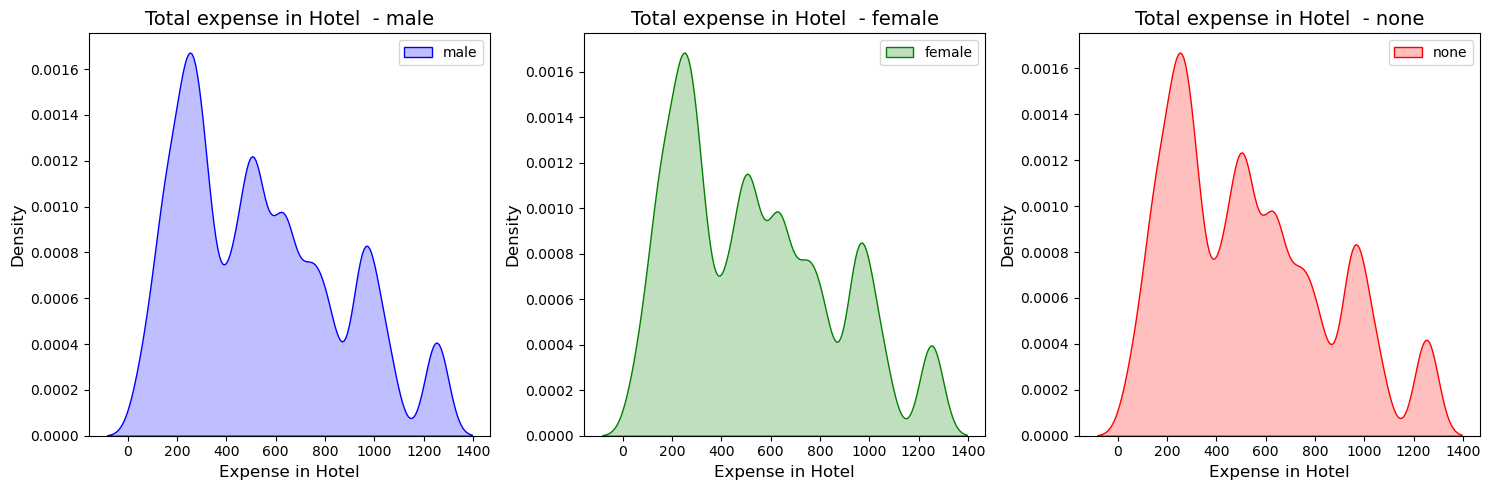

In [155]:
# Chart - 6 visualization code
# Extract unique genders from the dataset
genders = users_and_hotels["gender"].unique()  
colors = ["blue", "green", "red"]  

# Create subplots for each gender
plt.figure(figsize=(15, 5))
for i in range(len(genders)):
    plt.subplot(1, 3, i+1)  
    sns.kdeplot(data=users_and_hotels[users_and_hotels["gender"] == genders[i]], x="total", fill=True, color=colors[i], label=genders[i])
    plt.title(f"Total expense in Hotel  - {genders[i]}", fontsize=14)
    plt.xlabel("Expense in Hotel", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

# Adjust layout to fit the plots
plt.tight_layout()
plt.show()

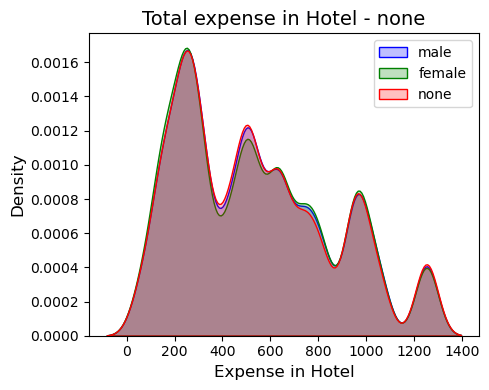

In [156]:
# Extract unique genders from the dataset
genders = users_and_hotels["gender"].unique()  
colors = ["blue", "green", "red"]  

# Create subplots for each gender
plt.figure(figsize=(5, 4))
for i in range(len(genders)):
    sns.kdeplot(data=users_and_hotels[users_and_hotels["gender"] == genders[i]], x="total", fill=True, color=colors[i], label=genders[i])
    plt.title(f"Total expense in Hotel - {genders[i]}", fontsize=14)
    plt.xlabel("Expense in Hotel", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

# Adjust layout to fit the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A KDE plot was selected to visualize the distribution of total (total expense in hotel) for each gender. The subplots provide individual clarity for each gender group, while the overlaid KDE plot allows a direct comparison of expense distributions.

##### 2. What is/are the insight(s) found from the chart?

All genders (male, female, none) exhibit similar expense patterns, with peaks in the range of 200 to 400 and additional peaks around 800 and 1200.
The distribution is fairly uniform across all genders, with no distinct differences observed.

The three genders (male, female, none) have overlapping expense distributions, indicating that total hotel expense is not strongly correlated with gender.

The overlapping expense distributions provide no meaningful distinction between genders, making it unlikely to contribute to accurate gender predictions.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Identifying the common expense ranges can help hotels offer targeted pricing strategies or promotional packages.
- The consistency in distribution across genders suggests that expense-based segmentation or pricing strategies can be applied universally without gender-specific adjustments.

#### Chart - 7

In [164]:
users_and_flights.head(3)

,code,company,name,gender,age,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,4You,Roy Braun,male,21,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,4You,Roy Braun,male,21,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,0,4You,Roy Braun,male,21,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019


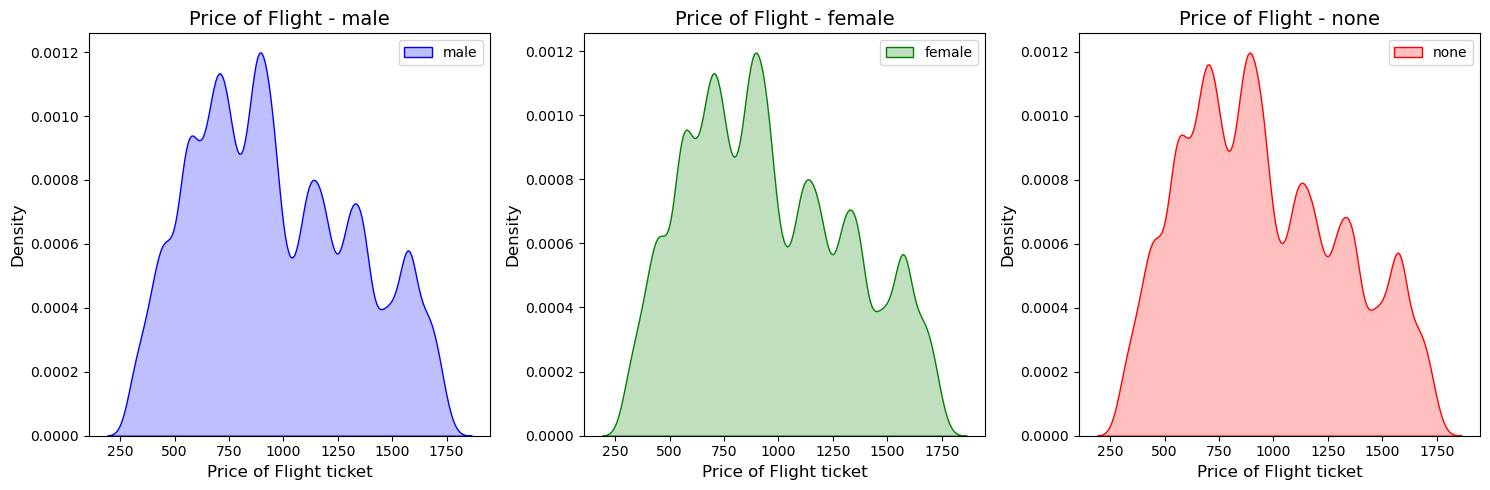

In [165]:
# Chart - 7 visualization code
# Extract unique genders from the dataset
genders = users_and_flights["gender"].unique()  
colors = ["blue", "green", "red"]  

# Create subplots for each gender
plt.figure(figsize=(15, 5))
for i in range(len(genders)):
    plt.subplot(1, 3, i+1)  
    sns.kdeplot(data=users_and_flights[users_and_flights["gender"] == genders[i]], x="price", fill=True, color=colors[i], label=genders[i])
    plt.title(f"Price of Flight - {genders[i]}", fontsize=14)
    plt.xlabel("Price of Flight ticket", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

# Adjust layout to fit the plots
plt.tight_layout()
plt.show()

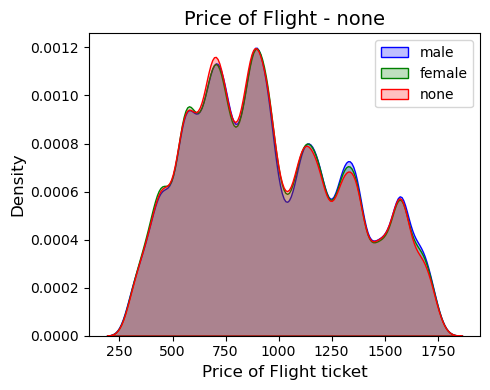

In [166]:
# Extract unique genders from the dataset
genders = users_and_flights["gender"].unique()  
colors = ["blue", "green", "red"]  

# Create subplots for each gender
plt.figure(figsize=(5, 4))
for i in range(len(genders)):
    sns.kdeplot(data=users_and_flights[users_and_flights["gender"] == genders[i]], x="price", fill=True, color=colors[i], label=genders[i])
    plt.title(f"Price of Flight - {genders[i]}", fontsize=14)
    plt.xlabel("Price of Flight ticket", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

# Adjust layout to fit the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A KDE plot was selected because it visualizes the distribution of flight ticket prices for each gender (male, female, none). Subplots provide individual clarity for each gender, and the overlaid KDE plot allows for direct comparison of the distributions.

##### 2. What is/are the insight(s) found from the chart?

- Flight ticket prices for all genders are concentrated between 500 and 1500, with peaks around 750, 1000, and 1250.
- No significant differences are observed in the price distributions for male, female, or none.
- All three genders (male, female, none) exhibit nearly identical ticket price distributions, showing no distinct correlation between ticket price and gender.
- The price of the flight does not show any meaningful variation across genders, making it an unlikely predictor for gender classification.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Identifying common price ranges can help airlines design pricing strategies, discounts, or promotions targeting the majority of customers.
- The similarity in distributions across genders suggests pricing strategies can be gender-neutral, focusing on broader customer demographics.

#### Chart - 8

In [174]:
gender_count_by_flight_type = users_and_flights.groupby(["flightType", "gender"])["gender"].count().unstack()
gender_count_by_flight_type

gender,female,male,none
flightType,,,
economic,26022,25910,25534
firstClass,38746,39480,38192
premium,26812,25858,25334


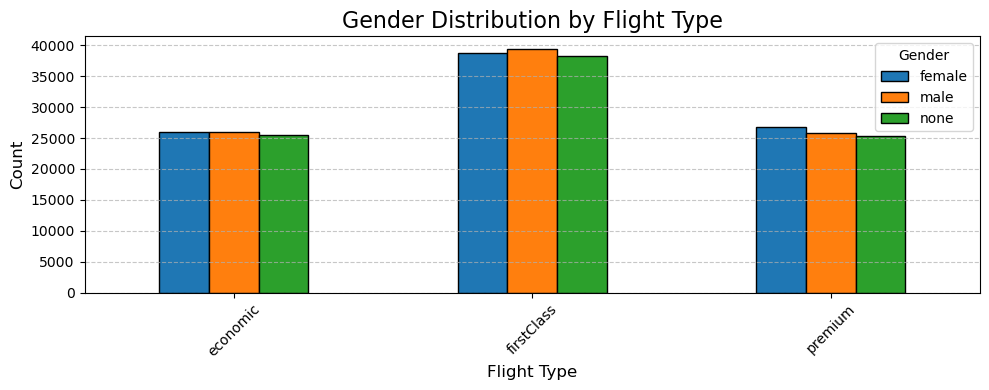

In [175]:
# Chart - 8 visualization code
gender_count_by_flight_type.plot(kind="bar", figsize=(10, 4), edgecolor="black")
plt.title("Gender Distribution by Flight Type", fontsize=16)
plt.xlabel("Flight Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen as it clearly visualizes the count of each gender (female, male, none) across different flight types (economic, firstClass, premium). This format allows for easy comparison of gender preferences for each flight type

##### 2. What is/are the insight(s) found from the chart?

- All three genders (female, male, none) are almost equally distributed across all flight types.
- FirstClass has the highest overall counts for all genders, while premium has slightly lower counts compared to economic.
- There is no significant variation in the choice of flight type among genders, suggesting that flight type preference is not influenced by gender.
- The uniform distribution of genders across flight types indicates no clear relationship between flight type and gender, making it unlikely to contribute to accurate gender predictions.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The balanced distribution indicates airlines can focus on offering services equally across genders without targeting specific flight types for a particular gender.
- The higher preference for firstClass suggests it is a key revenue driver and could be a focus for luxury or value-added services.

#### Chart - 9

In [183]:
# Chart - 9 visualization code
gender_count_by_agency = users_and_flights.groupby(["agency", "gender"])["gender"].count().unstack()
gender_count_by_agency

gender,female,male,none
agency,,,
CloudFy,39040,39392,37946
FlyingDrops,12888,13074,12796
Rainbow,39652,38782,38318


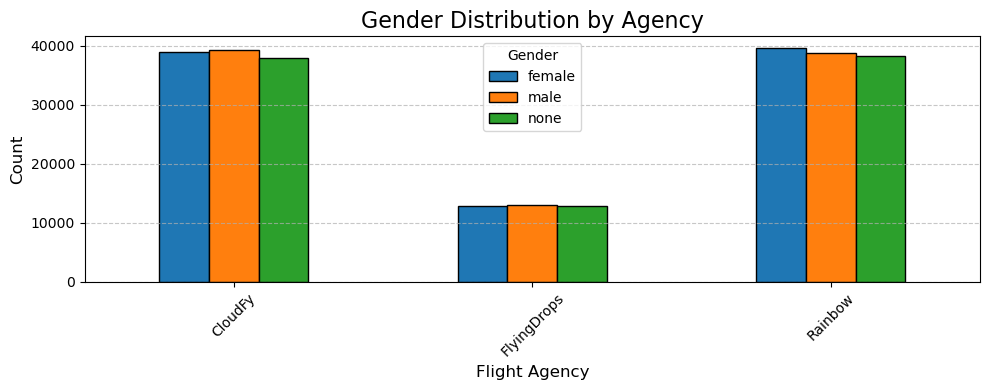

In [184]:
# Chart - 8 visualization code
gender_count_by_agency.plot(kind="bar", figsize=(10, 4), edgecolor="black")
plt.title("Gender Distribution by Agency", fontsize=16)
plt.xlabel("Flight Agency", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen because it effectively shows the count of each gender (female, male, none) across different flight agencies (CloudFy, FlyingDrops, Rainbow). This allows for clear comparison of gender representation across agencies.

##### 2. What is/are the insight(s) found from the chart?

- Gender distribution is consistent across all three agencies:
- CloudFy and Rainbow have the highest overall counts for all genders, with balanced distributions.
- FlyingDrops has significantly fewer customers overall, but the gender distribution remains balanced.
- There is no evident preference for a specific flight agency by any gender category.
- The uniform gender distribution across all agencies indicates no strong correlation between the flight agency and gender, making it unlikely to contribute significantly to gender prediction.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- The balanced distribution suggests that flight agencies can focus on generalized marketing strategies rather than gender-specific ones.
- The disparity in overall customer counts (e.g., FlyingDrops having fewer customers) highlights opportunities to investigate and improve customer acquisition or services for that agency.

#### Chart - 10

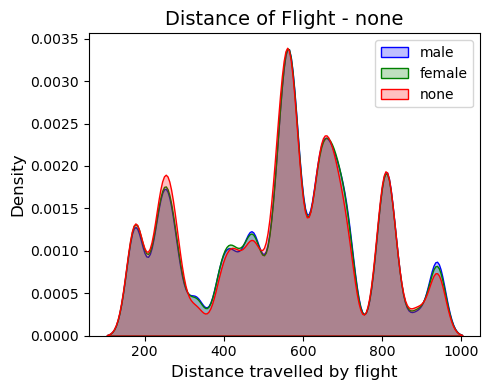

In [192]:
# Extract unique genders from the dataset
genders = users_and_flights["gender"].unique()  
colors = ["blue", "green", "red"]  

# Create subplots for each gender
plt.figure(figsize=(5, 4))
for i in range(len(genders)):
    sns.kdeplot(data=users_and_flights[users_and_flights["gender"] == genders[i]], x="distance", fill=True, color=colors[i], label=genders[i])
    plt.title(f"Distance of Flight - {genders[i]}", fontsize=14)
    plt.xlabel("Distance travelled by flight", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()

# Adjust layout to fit the plots
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The KDE plot was chosen to visualize the density distribution of distance traveled for each gender (male, female, none). This provides a clear picture of the variation in travel distances for different genders and allows for direct comparison between them.

##### 2. What is/are the insight(s) found from the chart?

- All genders (male, female, none) have very similar distributions for travel distances, with distinct peaks:
- There are peaks at distances around 200, 600, and 800, indicating common travel distances for all genders.
- The none gender follows the same distribution as male and female, suggesting no significant variation in travel distance based on gender.
- The highly similar distributions across genders indicate that travel distance does not provide meaningful discriminatory information for predicting gender.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the most common travel distances (200, 600, 800) can help airlines optimize routes or pricing strategies for popular travel ranges.
The similarity in distributions across genders suggests no gender-specific changes are required for route optimization.

#### Chart - 14 - Correlation Heatmap (making from the merged dataset)

In [200]:
merged_df.sample(3)

,code,company,gender,age,name_hotels,hotel_place,days_in_hotel,price_hotel,total,flightType,price_flight,flight_time,flight_distance,agency
1145684,139,4You,none,31,Hotel BD,Natal (RN),1,242.88,242.88,economic,583.60,0.72,277.70,CloudFy
8581902,1056,Acme Factory,male,37,Hotel Z,Aracaju (SE),4,208.04,832.16,firstClass,1574.28,2.10,808.85,FlyingDrops
6361607,761,Wonka Company,male,31,Hotel BW,Campo Grande (MS),1,60.39,60.39,economic,791.66,1.43,550.69,CloudFy


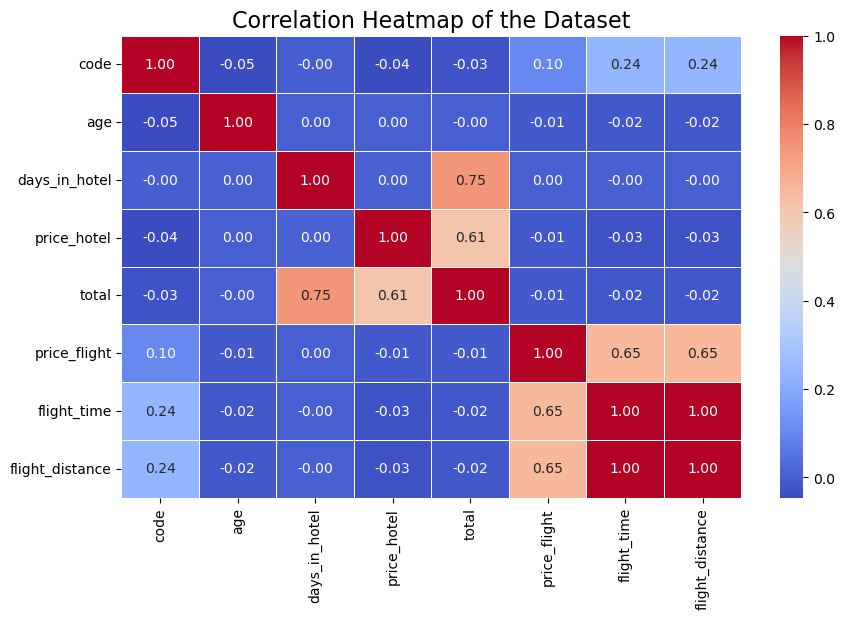

In [201]:
# Correlation Heatmap visualization code
numeric_df = merged_df.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(10, 6))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of the Dataset", fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap efficiently demonstrate the relationship between different variables

##### 2. What is/are the insight(s) found from the chart?

**Strong Positive Correlations:**

- total and days_in_hotel (0.75): As expected, the total expense is strongly correlated with the number of days stayed in the hotel.
- total and price_hotel (0.61): Higher per-day hotel prices contribute to higher total expenses.
- price_flight, flight_time, and flight_distance (0.65): These variables are interrelated, with longer distances and flight times associated with higher flight prices.

**Weak or Negligible Correlations:**

- age has no strong correlation with any variable, making it less likely to have predictive power in relation to other features.
- code (user ID) shows no meaningful relationships with other variables, as it is a categorical identifier.

**There is redundancy among some features:**

- total, price_hotel, and days_in_hotel are highly correlated. Including all three may introduce collinearity in the model.
- Similarly, price_flight, flight_time, and flight_distance are highly correlated and may not all be necessary for the model.
- Features like age and code do not show strong relationships with other variables, but age could still contribute independently to predicting gender.

**Feature Selection:**

- Retain only one of the strongly correlated variables in each group:
- From total, price_hotel, and days_in_hotel, consider keeping total.
- From price_flight, flight_time, and flight_distance, consider keeping flight_distance or price_flight.
 - Keep age as it might contribute independently to predicting gender

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [213]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [222]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [231]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [3]:
merged_df = pd.read_csv("users_hotels_flights.csv")

In [4]:
merged_df.head(3)

,code,company,gender,age,name_hotels,hotel_place,days_in_hotel,price_hotel,total,flightType,price_flight,flight_time,flight_distance,agency
0,0,4You,male,21,Hotel A,Florianopolis (SC),4,313.02,1252.08,firstClass,1434.38,1.76,676.53,FlyingDrops
1,0,4You,male,21,Hotel A,Florianopolis (SC),4,313.02,1252.08,firstClass,1292.29,1.76,676.53,FlyingDrops
2,0,4You,male,21,Hotel A,Florianopolis (SC),4,313.02,1252.08,firstClass,1487.52,1.66,637.56,CloudFy


In [239]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089602 entries, 0 to 3089601
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   code             int64  
 1   company          object 
 2   gender           object 
 3   age              int64  
 4   name_hotels      object 
 5   hotel_place      object 
 6   days_in_hotel    int64  
 7   price_hotel      float64
 8   total            float64
 9   flightType       object 
 10  price_flight     float64
 11  flight_time      float64
 12  flight_distance  float64
 13  agency           object 
dtypes: float64(5), int64(3), object(6)
memory usage: 330.0+ MB


In [5]:
# checking for missing values
merged_df.isnull().sum()

code               0
company            0
gender             0
age                0
name_hotels        0
hotel_place        0
days_in_hotel      0
price_hotel        0
total              0
flightType         0
price_flight       0
flight_time        0
flight_distance    0
agency             0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the dataset.

### 2. Handling Outliers

In [9]:
columns = merged_df.columns
for i in columns:
    if i != "date":
        unique_values = merged_df[i].unique()
        print(f"{i} : {unique_values}")
        print()

code : [   0    1    2 ... 1337 1338 1339]

company : ['4You' 'Monsters CYA' 'Wonka Company' 'Acme Factory' 'Umbrella LTDA']

gender : ['male' 'female' 'none']

age : [21 37 48 23 44 47 46 41 35 36 61 53 56 25 65 22 51 60 64 49 62 59 40 34
 27 42 24 54 28 55 39 38 32 29 52 57 31 45 30 43 58 63 50 26 33]

name_hotels : ['Hotel A' 'Hotel K' 'Hotel BD' 'Hotel Z' 'Hotel AU' 'Hotel AF' 'Hotel BW'
 'Hotel CB' 'Hotel BP']

hotel_place : ['Florianopolis (SC)' 'Salvador (BH)' 'Natal (RN)' 'Aracaju (SE)'
 'Recife (PE)' 'Sao Paulo (SP)' 'Campo Grande (MS)' 'Rio de Janeiro (RJ)'
 'Brasilia (DF)']

days_in_hotel : [4 2 3 1]

price_hotel : [313.02 263.41 242.88 208.04 312.83 139.1   60.39 165.99 247.62]

total : [1252.08  526.82  790.23 1053.64  313.02  485.76  416.08 1251.32  278.2
  417.3   263.41  181.17  242.88  120.78  626.04  832.16  165.99  990.48
  971.52  312.83  139.1   247.62  663.96  938.49  556.4   241.56  625.66
  624.12  939.06  495.24  728.64  331.98  742.86   60.39  497.97  208.04]


In [10]:
known_gender_df = merged_df[merged_df['gender'] != 'none']
unknown_gender_df= merged_df[merged_df['gender'] == 'none']

In [11]:
known_gender_df.shape, unknown_gender_df.shape

((2090734, 14), (998868, 14))

##### What all outlier treatment techniques have you used and why did you use those techniques?

- There are no outliers in the Dataset.
- I have separated the dataset with known gender and saved it to known_gender_df
- Similarly i have put unknown gender dataframe to the unknown_gender_df

### 3. Categorical Encoding

In [15]:
known_gender_df.sample(5)

,code,company,gender,age,name_hotels,hotel_place,days_in_hotel,price_hotel,total,flightType,price_flight,flight_time,flight_distance,agency
1014402,329,4You,female,46,Hotel Z,Aracaju (SE),2,208.04,416.08,economic,344.26,0.48,183.37,CloudFy
1965830,744,Wonka Company,male,26,Hotel AF,Sao Paulo (SP),2,139.10,278.20,firstClass,1142.29,0.85,327.55,FlyingDrops
1727869,661,Wonka Company,male,30,Hotel AU,Recife (PE),2,312.83,625.66,premium,998.18,1.55,595.03,CloudFy
1893918,717,Wonka Company,female,41,Hotel BD,Natal (RN),3,242.88,728.64,premium,427.25,0.46,176.33,Rainbow
750565,245,4You,female,40,Hotel CB,Rio de Janeiro (RJ),1,165.99,165.99,firstClass,1300.60,1.76,676.53,CloudFy


In [16]:
categorical_col = known_gender_df.select_dtypes(include=["object"]).columns

# Apply one-hot encoding
encoded_df = pd.get_dummies(known_gender_df, columns=categorical_col, drop_first=True)

In [17]:
encoded_df.head(3)

,code,age,days_in_hotel,price_hotel,total,price_flight,flight_time,flight_distance,company_Acme Factory,company_Monsters CYA,...,hotel_place_Florianopolis (SC),hotel_place_Natal (RN),hotel_place_Recife (PE),hotel_place_Rio de Janeiro (RJ),hotel_place_Salvador (BH),hotel_place_Sao Paulo (SP),flightType_firstClass,flightType_premium,agency_FlyingDrops,agency_Rainbow
0,0,21,4,313.02,1252.08,1434.38,1.76,676.53,False,False,...,True,False,False,False,False,False,True,False,True,False
1,0,21,4,313.02,1252.08,1292.29,1.76,676.53,False,False,...,True,False,False,False,False,False,True,False,True,False
2,0,21,4,313.02,1252.08,1487.52,1.66,637.56,False,False,...,True,False,False,False,False,False,True,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

- Converts categorical variables into binary (0/1) columns for each category.
- Each unique category gets its own column, and the presence of the category is marked with a 1.

Why use One-Hot Encoding?:

- Suitable for nominal (unordered) categorical data, where the categories have no intrinsic order (e.g., gender, flightType, agency).
- It avoids imposing any ordinal relationship between categories, ensuring that the machine learning model treats them equally.
- Widely supported by most machine learning algorithms, especially linear models and tree-based models.

Implementation:

- Used pd.get_dummies with drop_first=True to avoid the dummy variable trap (multicollinearity).

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [22]:
# Expand Contraction

#### 2. Lower Casing

In [24]:
# Lower Casing

#### 3. Removing Punctuations

In [26]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [28]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [30]:
# Remove Stopwords

In [31]:
# Remove White spaces

#### 6. Rephrase Text

In [33]:
# Rephrase Text

#### 7. Tokenization

In [35]:
# Tokenization

#### 8. Text Normalization

In [37]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [41]:
# POS Taging

#### 10. Text Vectorization

In [43]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting
ml_df = encoded_df.drop(columns = ['code', 'days_in_hotel', 'price_hotel', 'flight_time', 'flight_distance']) 

In [49]:
ml_df.sample(3)

,age,total,price_flight,company_Acme Factory,company_Monsters CYA,company_Umbrella LTDA,company_Wonka Company,gender_male,name_hotels_Hotel AF,name_hotels_Hotel AU,...,hotel_place_Florianopolis (SC),hotel_place_Natal (RN),hotel_place_Recife (PE),hotel_place_Rio de Janeiro (RJ),hotel_place_Salvador (BH),hotel_place_Sao Paulo (SP),flightType_firstClass,flightType_premium,agency_FlyingDrops,agency_Rainbow
2753597,33,485.76,947.95,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1223726,25,139.10,791.66,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1762097,45,625.66,677.10,False,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False


##### What all feature selection methods have you used  and why?

**Manual Feature Selection:**

- Dropped features (code, days_in_hotel, price_hotel, flight_time, and flight_distance) that were either:
- Irrelevant: Columns like code are identifiers and do not contribute to predicting the target.
- Highly Correlated: Features like days_in_hotel and price_hotel were dropped because total already encapsulates this information, avoiding  multicollinearity.
- Redundant: Features like flight_time and flight_distance were dropped as they are strongly correlated with price_flight, which was retained.

**Domain Knowledge:**

Used domain understanding to retain meaningful features like age, total, price_flight, and encoded categorical variables (company, name_hotels, etc.), which are likely to influence gender prediction.

**One-Hot Encoding:**

Applied one-hot encoding to categorical variables like company, gender, name_hotels, etc., to convert them into numerical format suitable for machine learning models.

##### Which all features you found important and why?

**Retained Features:**

- age: Age is a significant demographic feature that can influence the gender prediction model.
- total: Captures the combined expenditure, which might indicate preferences or habits correlated with gender.
- price_flight: Likely to vary with preferences for travel, which might indirectly correlate with gender.

**Categorical Variables:**
- company: Different companies may have varied demographic distributions, indirectly aiding gender classification.
- name_hotels and hotel_place: Preferences for specific hotels or locations might provide insights into gender tendencies.
- flightType and agency: Choice of flight type and agency might be associated with gender preferences.

**Dropped Features:**

- code: Identifiers do not hold any predictive value.
- days_in_hotel, price_hotel: These were redundant due to the inclusion of total.
- flight_time, flight_distance: These were highly correlated with price_flight, making them redundant.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

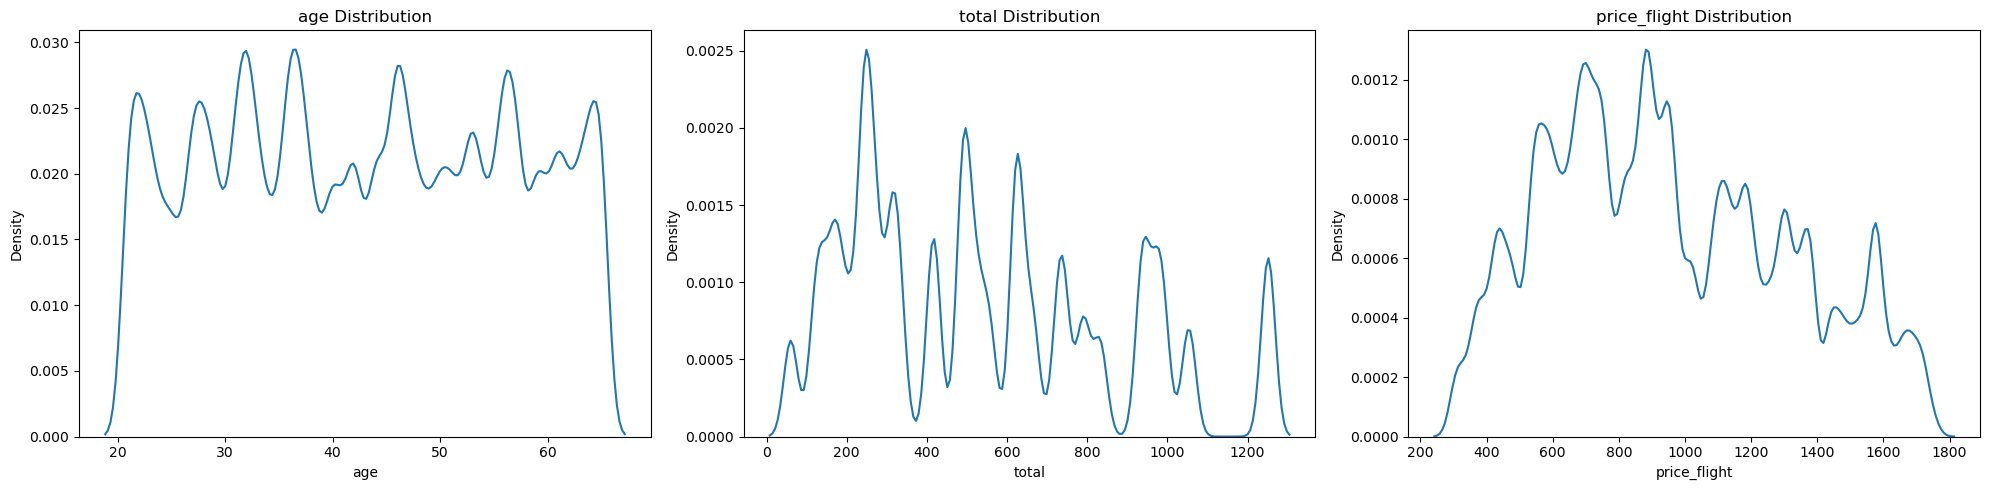

In [56]:
numerical_col = ml_df.select_dtypes(include=["float", "int"]).columns

plt.figure(figsize=(20, 5))

for i in range(len(numerical_col)):
    plt.subplot(1, len(numerical_col), i + 1)  
    sns.kdeplot(data=ml_df, x=numerical_col[i]) 
    
    plt.title(f"{numerical_col[i]} Distribution", fontsize=12)
    plt.xlabel(numerical_col[i], fontsize=10)
    plt.ylabel("Density", fontsize=10)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

Yes, i think the few columns need data transformation as no column is close to normal distribution here which can reduce the predictive capabilities of a machine learning model

### 6. Data Scaling (I will do it after splitting the data into training and test)

In [59]:
# Scaling your data
# i will do it after splitting into test and training datasets

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [62]:
ml_df.columns

Index(['age', 'total', 'price_flight', 'company_Acme Factory',
       'company_Monsters CYA', 'company_Umbrella LTDA',
       'company_Wonka Company', 'gender_male', 'name_hotels_Hotel AF',
       'name_hotels_Hotel AU', 'name_hotels_Hotel BD', 'name_hotels_Hotel BP',
       'name_hotels_Hotel BW', 'name_hotels_Hotel CB', 'name_hotels_Hotel K',
       'name_hotels_Hotel Z', 'hotel_place_Brasilia (DF)',
       'hotel_place_Campo Grande (MS)', 'hotel_place_Florianopolis (SC)',
       'hotel_place_Natal (RN)', 'hotel_place_Recife (PE)',
       'hotel_place_Rio de Janeiro (RJ)', 'hotel_place_Salvador (BH)',
       'hotel_place_Sao Paulo (SP)', 'flightType_firstClass',
       'flightType_premium', 'agency_FlyingDrops', 'agency_Rainbow'],
      dtype='object')

##### Do you think that dimensionality reduction is needed? Explain Why?

I dont think that my dataset needs the dimensionality reduction right now.

In [65]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = ml_df.drop(columns = ["gender_male"])
y = ml_df['gender_male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### What data splitting ratio have you used and why? 

- Used a 80:20 split ratio (test_size=0.2) for training and testing the data.

Why This Ratio?

- Standard Practice: An 80:20 split is a common practice in machine learning, ensuring the model has enough data to learn patterns (80% for training) while retaining sufficient data (20% for testing) to evaluate its performance.

**Balanced Evaluation: This ratio strikes a good balance between training and testing:**
- 80% Training Data: Provides the model with a robust dataset to learn from.
- 20% Testing Data: Ensures the test set is large enough to assess the model's generalization performance.
- Dataset Size: For datasets with a large number of samples, this split ratio ensures computational efficiency and maintains reliable evaluation metrics.

### 9. Handling Imbalanced Dataset

In [73]:
y_train

2101457    False
2512185    False
811554      True
1527123     True
983168      True
           ...  
389892     False
2144828    False
160208     False
1000263    False
150234     False
Name: gender_male, Length: 1672587, dtype: bool

In [74]:
print("Gender ratio in training dataset:")
print("Male : ", round((y_train[y_train == True].shape[0]/y_train.shape[0])*100),2)
print("Female :", round((y_train[y_train == False].shape[0]/y_train.shape[0])*100), 2)
print("*"*90)
print("Gender ratio in testing dataset:")
print("Male :", round((y_test[y_test == True].shape[0]/y_test.shape[0])*100),2)
print("Female :", round((y_test[y_test == False].shape[0]/y_test.shape[0])*100),2)

Gender ratio in training dataset:
Male :  49 2
Female : 51 2
******************************************************************************************
Gender ratio in testing dataset:
Male : 49 2
Female : 51 2


##### Do you think the dataset is imbalanced? Explain Why.

NO data is not imbalaced.

In [77]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### Data Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ***7. ML Model Implementation***

### ML Model - 1 (Logistic Regression)

In [84]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit the Algorithm
lr = LogisticRegression()

# Fit the model on training data
lr.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5245093232762641

Classification Report:
               precision    recall  f1-score   support

       False       0.53      0.48      0.51    212112
        True       0.52      0.57      0.54    206035

    accuracy                           0.52    418147
   macro avg       0.53      0.53      0.52    418147
weighted avg       0.53      0.52      0.52    418147



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix 

array([[102034, 110078],
       [ 88747, 117288]], dtype=int64)

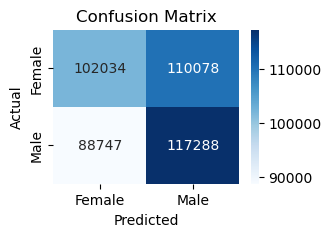

In [87]:
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [173]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameter distribution
param_dist = {
    'C': uniform(loc=0.01, scale=10),  
    'solver': ['lbfgs', 'liblinear'],  
    'max_iter': [100, 200, 500]        
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=param_dist,
    n_iter=10,               
    cv=5,                    
    scoring='accuracy',      
    verbose=1,               
    random_state=42          
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train_scaled, y_train)

# Display best parameters and cross-validation score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 0.5908361216819946, 'max_iter': 100, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.5241718362147813


Test Set Accuracy: 0.5244949742554652


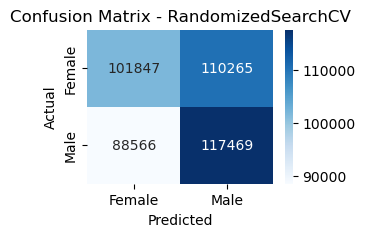

In [177]:
# Evaluate on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix - RandomizedSearchCV")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##### Which hyperparameter optimization technique have you used and why?


- Efficiency with Large Datasets: RandomizedSearchCV is faster than GridSearchCV as it randomly samples a fixed number of parameter combinations, making it suitable for large datasets and models that require significant computation.
- Wide Parameter Exploration: It allows exploration over a broad range of parameter values without the exhaustive search of GridSearchCV.
- Customizable Iterations: You can specify the number of iterations to limit the search, balancing performance and computation time.
- Scalability: RandomizedSearchCV can be parallelized effectively, making it efficient for large datasets.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Accuracy Before Optimization:

The Logistic Regression model without optimization achieved an accuracy of 52.45% on the test set.

- Accuracy After Optimization:

After applying RandomizedSearchCV, the accuracy on the test set remained 52.45%, indicating no significant improvement in this case.

### ML Model - 2 (Decision Trees)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [179]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [183]:
# Predict on the test data
y_pred = dt.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6226494510303793

Classification Report:
               precision    recall  f1-score   support

       False       0.61      0.71      0.66    212112
        True       0.64      0.53      0.58    206035

    accuracy                           0.62    418147
   macro avg       0.63      0.62      0.62    418147
weighted avg       0.63      0.62      0.62    418147



In [185]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix 

array([[150156,  61956],
       [ 95832, 110203]], dtype=int64)

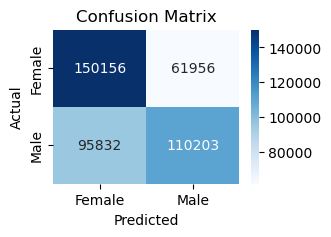

In [187]:
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [191]:
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50], 
    'min_samples_split': [2, 5, 10, 20], 
    'min_samples_leaf': [1, 2, 4, 10],  
}

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=2,  
    scoring='accuracy',
    cv=5,  
    verbose=1,
    random_state=42,
    n_jobs= -1
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 40}
Best Cross-Validation Score: 0.7130128364699794


In [193]:
# Use the best estimator to predict on the test data
best_dt_model = random_search.best_estimator_
y_pred = best_dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy on Test Data: 0.7098914974877256

Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.75      0.72    212112
        True       0.72      0.67      0.69    206035

    accuracy                           0.71    418147
   macro avg       0.71      0.71      0.71    418147
weighted avg       0.71      0.71      0.71    418147



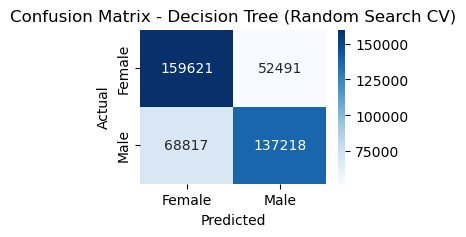

In [199]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix - Decision Tree (Random Search CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


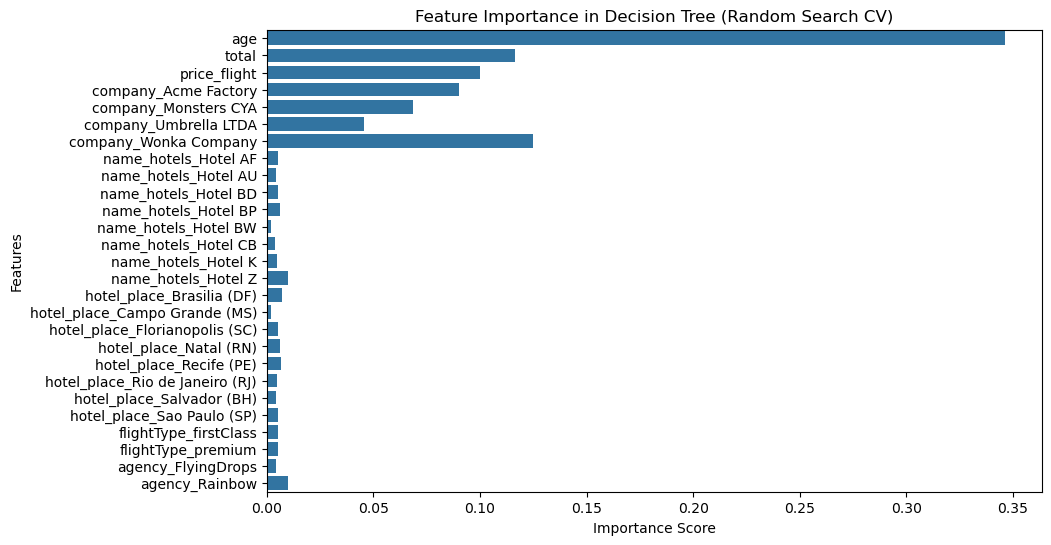

In [201]:
# Feature Importance Visualization
feature_importances = best_dt_model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Decision Tree (Random Search CV)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

- The RandomizedSearchCV technique was used for hyperparameter optimization.
**Why?**
- Efficiency: RandomizedSearchCV evaluates a random combination of hyperparameters, making it faster compared to GridSearchCV, especially for large - datasets and a wide range of parameters.
- Flexibility: It allows the specification of the number of iterations, enabling control over computational costs.
- Broader Exploration: It explores a diverse range of parameter combinations, increasing the likelihood of finding optimal parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Accuracy Before Optimization:**
- Decision Tree (Default Parameters): 62.95%

**Accuracy After Optimization:**
- Decision Tree (Random Search CV): 70.09%

**Improvement:**
- A significant improvement of 7.14% in accuracy was observed after applying RandomizedSearchCV for hyperparameter tuning.

**Updated Metrics:**
- Precision: Improved for both classes (Female: 0.70, Male: 0.72)
- Recall: Higher recall values indicate better true positive predictions.
- F1-Score: Enhanced F1-scores for both classes confirm better model balance between precision and recall.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Accuracy:**
- Indicates the percentage of correct predictions (Male/Female).
- Higher accuracy improves the reliability of predictions, critical for applications like gender-based marketing or customer segmentation.

**Precision:**
- Indicates the proportion of correctly identified instances for a class (e.g., Male).
- High precision ensures targeted actions (e.g., personalized offers or campaigns) are directed to the right gender group, minimizing wasted resources.

**Recall:**
- Measures the model's ability to identify all relevant instances.
- High recall ensures fewer missed opportunities for gender-based strategies, like identifying customers who might respond to specific promotions.

**F1-Score:**
- Balances precision and recall, crucial for use cases where both false positives and false negatives have significant business implications.
- An improved F1-score suggests the model is robust and can handle imbalanced data well.

**Business Impact:**
- The optimized Decision Tree model helps in accurate gender classification, leading to better customer profiling, targeted marketing, and improved customer experience, which directly impacts revenue and customer retention.

### ML Model - 3 (XG Boost)

In [208]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [210]:
# Predict on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Data: 0.7448815847058571

Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.79      0.76    212112
        True       0.76      0.70      0.73    206035

    accuracy                           0.74    418147
   macro avg       0.75      0.74      0.74    418147
weighted avg       0.75      0.74      0.74    418147



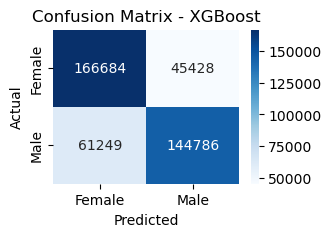

In [212]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


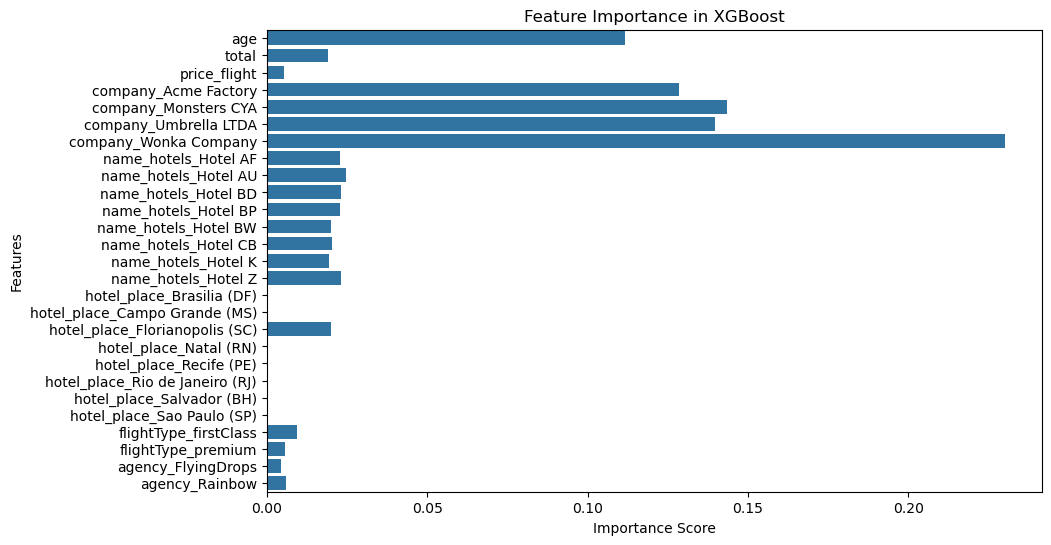

In [216]:
# Feature Importance Visualization
feature_importances = xgb_model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [107]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [219]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 10],  
    'gamma': [0, 0.1, 0.2, 0.3],  
    }

# Initialize RandomizedSearchCV
xgb_model = XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=2,  
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)



Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1}
Best Cross-Validation Score: 0.7306460015216654


In [221]:
# Use the best estimator to predict on the test data
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Data: 0.7307238841842701

Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.78      0.75    212112
        True       0.75      0.68      0.71    206035

    accuracy                           0.73    418147
   macro avg       0.73      0.73      0.73    418147
weighted avg       0.73      0.73      0.73    418147



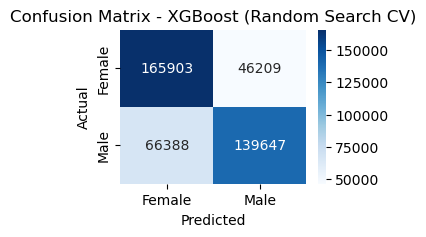

In [223]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix - XGBoost (Random Search CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

- RandomizedSearchCV was used for hyperparameter tuning in the XGBoost model.

- Efficiency: It is faster than GridSearchCV, particularly for large datasets and complex models like XGBoost, where there are many hyperparameters to explore.
- Flexibility: RandomizedSearchCV allows controlling the number of combinations to test, ensuring a balance between computational cost and performance.
Coverage: It explores a diverse set of parameter combinations, increasing the likelihood of identifying a good configuration.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- Accuracy:
Ensures a high percentage of correct gender classifications, leading to better customer segmentation and personalization.
- Precision:
High precision minimizes incorrect predictions, reducing wasted marketing efforts or customer misclassification.
- Recall:
High recall ensures most individuals in a target gender group are identified, maximizing the impact of gender-specific strategies.
- F1-Score:
Balances precision and recall, critical for applications where both false positives and false negatives have a significant business impact.
- Business Impact:

A well-performing model ensures effective gender classification, enhancing customer engagement, improving marketing ROI, and fostering customer satisfaction.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- Chosen Model: XGBoost with Random Search CV

- Highest Accuracy: Achieved the highest accuracy (74%) compared to Logistic Regression and Decision Trees.
- Robust Performance: XGBoost handles large datasets and complex patterns effectively, ensuring better generalization.
- Feature Importance: It provides clear insights into which features are most significant, aiding in model interpretability and potential business decisions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

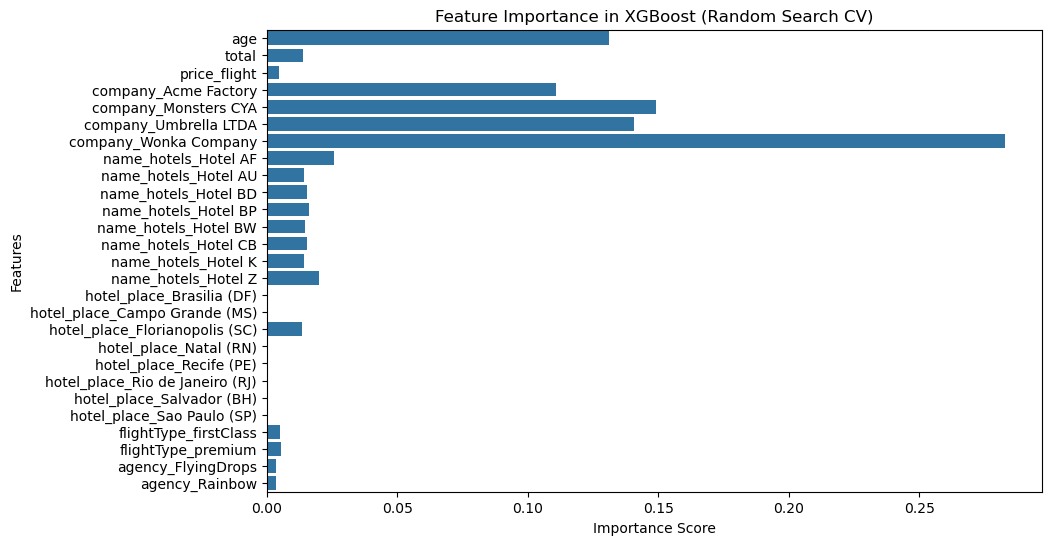

In [236]:
# Feature Importance Visualization
feature_importances = best_xgb_model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in XGBoost (Random Search CV)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**Model Used**
- XGBoost with Random Search CV
- Description: XGBoost (Extreme Gradient Boosting) is an ensemble learning method that builds multiple decision trees sequentially to optimize performance. It minimizes error by iteratively correcting predictions of previous models.
- Hyperparameter Optimization: Random Search CV was used to tune key parameters, improving the model's performance and ensuring it generalizes well to unseen data.

**Feature Importance**

- The bar chart above displays the relative importance of features used in the XGBoost model. Below is an explanation of the most significant features:

**Age:**

- The most critical feature in determining gender.
- Likely reflects age-based preferences or behaviors related to travel, company choices, and spending.

**Total (Price Flight + Price Hotel):**

- Indicates the cumulative expenditure, providing insights into spending habits that correlate with gender.

**Company Associations:**

- Companies like Wonka Company and Monsters CYA show a strong influence, likely due to gender-specific employment patterns or affiliations.

**Hotel Preferences:**

- Specific hotels, such as Hotel AF and Hotel AU, exhibit significant gender differentiation, possibly reflecting travel or accommodation preferences.

**Flight Price:**

- Spending on flights is a crucial indicator of gender-specific travel behavior.

**Flight Type (First Class, Premium):**

- Less significant but provides minor differentiation based on travel class preferences.

**Hotel Locations:**
- Some locations like Brasilia (DF) and Natal (RN) have a slight impact, potentially due to gender-based travel trends.

- The feature importance chart provides a clear view of which features drive predictions, aiding transparency and interpretability.
- Helps identify key business areas where decisions could be optimized for better gender targeting.

**Business Impact:**

- Age and spending habits can inform targeted marketing campaigns.
- Company and hotel preferences allow personalized recommendations.
- Understanding gender preferences in travel and accommodation enhances customer satisfaction and retention.

## ***8.*** ***Future Work (Optional)***

#### Making a pipeline keeping only the most important columns for the prediction 

In [248]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
merged_df = pd.read_csv("users_hotels_flights.csv")

# Split known and unknown gender data
known_gender_df = merged_df[merged_df['gender'] != 'none']
unknown_gender_df = merged_df[merged_df['gender'] == 'none']

# Select important columns (excluding irrelevant ones)
important_cols = ['age', 'total', 'company', 'name_hotels', 'gender']
known_data = known_gender_df[important_cols]

# Automatically identify categorical and numerical columns
X = known_data.drop(columns=['gender'])
y = known_data['gender']  # Target column before encoding

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ], remainder='drop')),
    ('model', XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        gamma=0.1,
        random_state=42
    ))
])

# Encode the target column (gender)
# This ensures binary encoding for gender: 0 for female, 1 for male
y_encoded = (y == 'male').astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['company', 'name_hotels']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'total'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_st...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [250]:
# Evaluate the model
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7325055542668009

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75    212112
           1       0.75      0.68      0.72    206035

    accuracy                           0.73    418147
   macro avg       0.73      0.73      0.73    418147
weighted avg       0.73      0.73      0.73    418147



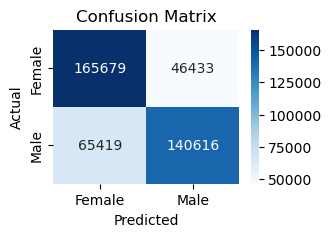

In [254]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [256]:
# Save the File
# Save the pipeline
joblib.dump(pipeline, 'gender_classification_pipeline.pkl')

['gender_classification_pipeline.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [259]:
# Load the File and predict unseen data.
saved_pipeline = joblib.load('gender_classification_pipeline.pkl')
y_pred = saved_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7325055542668009

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75    212112
           1       0.75      0.68      0.72    206035

    accuracy                           0.73    418147
   macro avg       0.73      0.73      0.73    418147
weighted avg       0.73      0.73      0.73    418147



### Using the above trained pipeline to predict the gender of the users which has "none" in the gender column

In [266]:
import pandas as pd
import joblib

# Load the saved pipeline
saved_pipeline = joblib.load('gender_classification_pipeline.pkl')

# Filter the unknown gender data
unknown_gender_df = merged_df[merged_df['gender'] == 'none'].copy()  # Adding .copy() to avoid warnings

# Select important columns (same as used during training)
important_cols = ['age', 'total', 'company', 'name_hotels']
unknown_gender_df_filtered = unknown_gender_df[important_cols]

# Predict the gender for unknown data
predictions = saved_pipeline.predict(unknown_gender_df_filtered)

# Add predictions to the DataFrame
unknown_gender_df.loc[:, 'predicted_gender'] = predictions

# Explicitly cast the 'predicted_gender' column to object dtype before mapping
unknown_gender_df['predicted_gender'] = unknown_gender_df['predicted_gender'].astype(object)

# Map the numeric predictions back to gender labels
unknown_gender_df['predicted_gender'] = unknown_gender_df['predicted_gender'].map({0: 'female', 1: 'male'})

# Save the updated DataFrame to a new CSV file
unknown_gender_df.to_csv('unknown_gender_with_predictions.csv', index=False)

# Print a few rows of the updated DataFrame for verification
print(unknown_gender_df.head())

print("\nPredicted genders for rows with 'none' have been saved to 'unknown_gender_with_predictions.csv'.")


       code company gender  age name_hotels    hotel_place  days_in_hotel  \
19076     5    4You   none   47     Hotel K  Salvador (BH)              2   
19077     5    4You   none   47     Hotel K  Salvador (BH)              2   
19078     5    4You   none   47     Hotel K  Salvador (BH)              2   
19079     5    4You   none   47     Hotel K  Salvador (BH)              2   
19080     5    4You   none   47     Hotel K  Salvador (BH)              2   

       price_hotel   total  flightType  price_flight  flight_time  \
19076       263.41  526.82    economic        921.08         1.76   
19077       263.41  526.82    economic        609.83         1.76   
19078       263.41  526.82  firstClass       1665.24         1.76   
19079       263.41  526.82  firstClass       1040.84         1.76   
19080       263.41  526.82     premium       1289.05         2.16   

       flight_distance   agency predicted_gender  
19076           676.56  Rainbow           female  
19077           676.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Project Summary:**

- This project focused on building a gender classification model using various machine learning algorithms such as Logistic Regression, Decision Trees, and XGBoost.
- We performed data preprocessing, including encoding categorical variables, feature scaling, and selecting important features based on feature importance scores.
- Using XGBoost with hyperparameter tuning (RandomizedSearchCV), we achieved the best performance with a cross-validation accuracy of ~73%, making it the final chosen model.

**Key Steps in the Workflow:**

1. Data Cleaning and Preprocessing:
- Handled missing or irrelevant columns and used robust encoding and scaling techniques.
2. Feature Selection:
- Focused on important features like age, total, company, and name_hotels, removing less impactful columns such as flight_type and agency based on feature importance.
3. Model Development:
- Multiple models were trained and evaluated using metrics like accuracy, precision, recall, F1-score, and confusion matrix.
- XGBoost emerged as the best-performing model.
4. Pipeline Creation:
- A robust pipeline was developed to handle end-to-end preprocessing, training, and prediction tasks efficiently.
5. Model Deployment:
- The trained pipeline was saved using joblib and reused to predict genders for rows with unknown values (none).
6. Business Impact:

- This gender classification model can help businesses like hotels, airlines, or agencies better understand their customer demographics, enabling targeted marketing strategies and personalized services.
- By automating the gender classification process, operational efficiency is improved, saving time and resources.

7. Challenges and Solutions:

- Challenge: Handling large datasets and avoiding memory-related errors.
- Solution: Optimized the pipeline with batch processing and efficient hyperparameter tuning (RandomizedSearchCV instead of GridSearchCV).
- Challenge: Chained assignment warnings and dtype incompatibility issues.
- Solution: Used .copy() and .astype(object) to ensure type consistency and prevent warnings.

8. Future Enhancements:

- Incorporate advanced explainability tools like SHAP or LIME to better understand the model's decisions.
- Explore deep learning techniques for further improving performance.
- Integrate the pipeline with a web application for real-time predictions.
- Use additional demographic features (if available) to enhance prediction accuracy.

9. Final Outcomes:

- The project successfully predicted genders for rows with missing gender information and saved the results to a CSV file.
- The deployed pipeline ensures reusability and scalability, making it ready for real-world applications.
- This concludes the Gender Classification Project. 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***